## Part 1 : Voronoi mesh generation

In [3]:
import warnings ## Org
warnings.filterwarnings('ignore') ## Org

import os, sys ## Org
import geopandas as gpd ## Org
from mf6Voronoi.geoVoronoi import createVoronoi ## Org
from mf6Voronoi.meshProperties import meshShape ## Org
from mf6Voronoi.utils import initiateOutputFolder, getVoronoiAsShp ## Org

In [4]:
#Create mesh object specifying the coarse mesh and the multiplier
vorMesh = createVoronoi(meshName='ugMine',maxRef = 150, multiplier=1.5)

#Open limit layers and refinement definition layers
vorMesh.addLimit('active','shp/activeAreas.shp') 
vorMesh.addLayer('river','shp/Rivers.shp',40)
vorMesh.addLayer('labours','shp/ugLaboursArea.shp',20)
#vorMesh.addLayer('level4000','shp/Level4000.shp',20)
#vorMesh.addLayer('level3800','shp/Level3800.shp',20)

In [5]:
#Generate point pair array
vorMesh.generateOrgDistVertices() ## Org

#Generate the point cloud and voronoi
vorMesh.createPointCloud() ## Org
vorMesh.generateVoronoi() ## Org


                                                                                                    
*mSi                                                                                       
gQQ>                                                                                       
dQU;                                 +|:                                     :v)_          
;PQm'                                %B$s                                    .gQMe          
PYQ7.                               -3QE_                                     <e}'          
c8Qx                                '$RT                                                    
?HM"   )7yw1=       .)r]jJfzi.   `=>!QDuvxxi_   `<s[LCwe<    ,>seua:  ^!C3o' `eur           
oRk= vdZ6qDQE"     ]PF)/+vJBNe`  :l{6Q8!I![s' .ebJ<//%3MD]   )fffQDv.ebPhZY/ QQQ#           
JQS'7b]_  ?Q$r     EWy     3Qg^     pQX       :GWj    _mQ5'     lQ&TT4v   .  rQDl           
5QnCV/    ]QZ<      :"/iiss4Q5:    -GQS        .:|/<v%IPQJ`     

In [6]:
#Export generated voronoi mesh
initiateOutputFolder('output') ## Org
getVoronoiAsShp(vorMesh.modelDis, shapePath='output/'+vorMesh.modelDis['meshName']+'.shp') ## Org

The output folder output exists and has been cleared

/----Generation of the voronoi shapefile----/

Time required for voronoi shapefile: 1.00 seconds 



<Axes: >

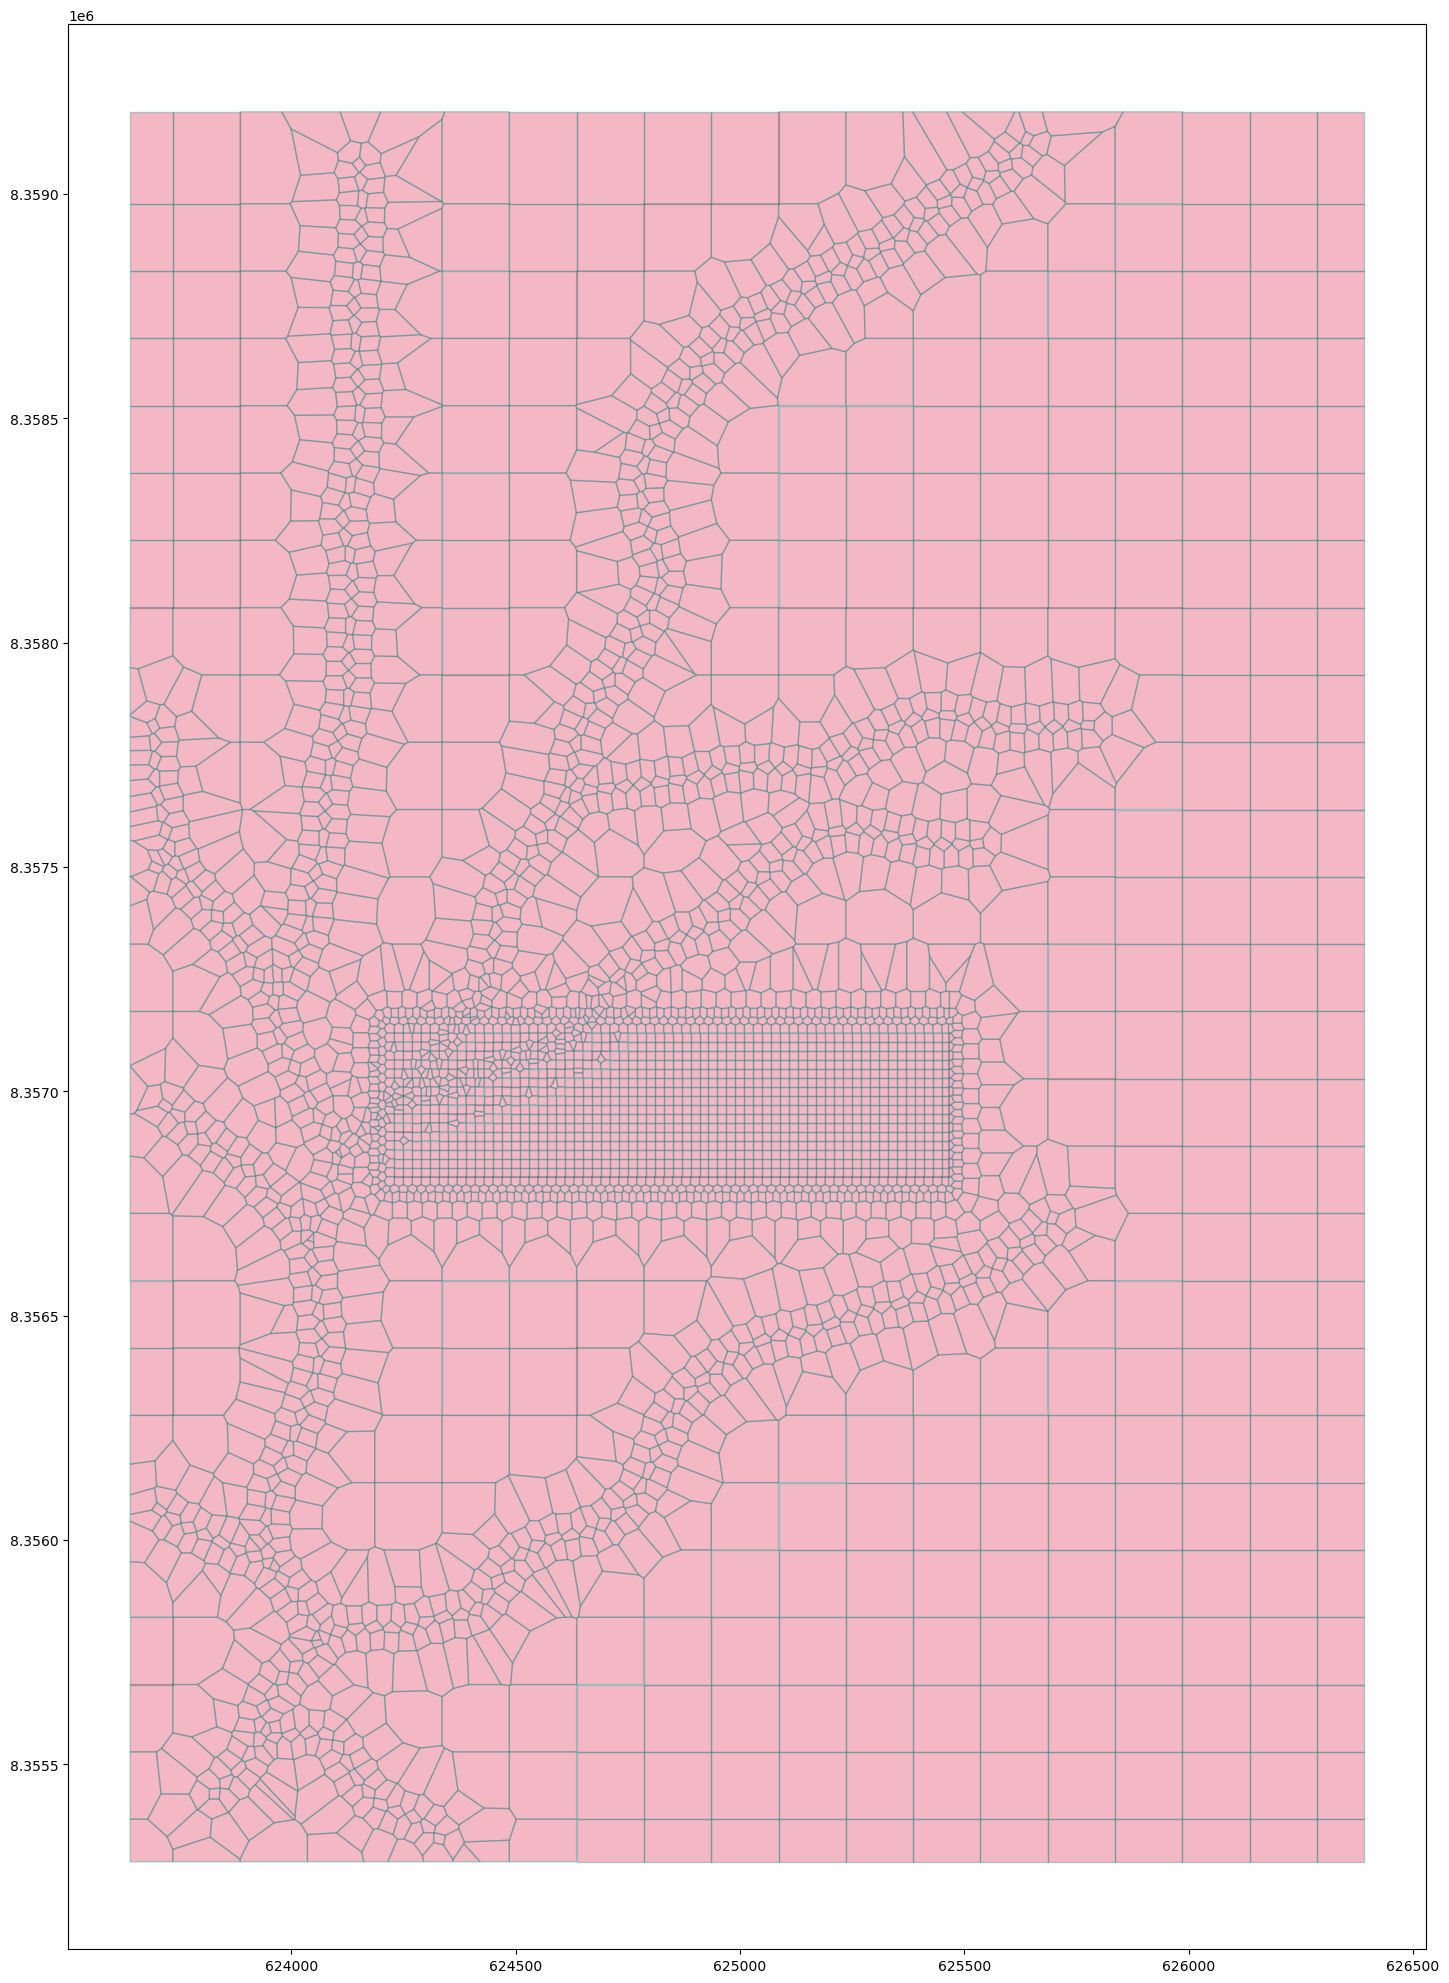

In [7]:
# Show the resulting voronoi mesh

#open the mesh file
mesh=gpd.read_file('output/'+vorMesh.modelDis['meshName']+'.shp') ## Org
#plot the mesh
mesh.plot(figsize=(35,25), fc='crimson', alpha=0.3, ec='teal') ## Org

## Part 2 generate disv properties

In [9]:
# open the mesh file
mesh=meshShape('output/'+vorMesh.modelDis['meshName']+'.shp') ## Org

In [10]:
# get the list of vertices and cell2d data
gridprops=mesh.get_gridprops_disv() ## Org


                                                                                                    
*mSi                                                                                       
gQQ>                                                                                       
dQU;                                 +|:                                     :v)_          
;PQm'                                %B$s                                    .gQMe          
PYQ7.                               -3QE_                                     <e}'          
c8Qx                                '$RT                                                    
?HM"   )7yw1=       .)r]jJfzi.   `=>!QDuvxxi_   `<s[LCwe<    ,>seua:  ^!C3o' `eur           
oRk= vdZ6qDQE"     ]PF)/+vJBNe`  :l{6Q8!I![s' .ebJ<//%3MD]   )fffQDv.ebPhZY/ QQQ#           
JQS'7b]_  ?Q$r     EWy     3Qg^     pQX       :GWj    _mQ5'     lQ&TT4v   .  rQDl           
5QnCV/    ]QZ<      :"/iiss4Q5:    -GQS        .:|/<v%IPQJ`     

100%|████████████████████████████████████████████████████████████████████████████| 3682/3682 [00:00<00:00, 9500.24it/s]



Extracting cell2d data and grid index


100%|████████████████████████████████████████████████████████████████████████████| 3682/3682 [00:01<00:00, 2332.74it/s]


In [11]:
#create folder
initiateOutputFolder('json') ## Org

#export disv
mesh.save_properties('json/disvDict.json') ## Org

The output folder json exists and has been cleared
